<a href="https://colab.research.google.com/github/Mohican999370/Reverie/blob/master/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
print(f'the date now is {datetime.datetime.now()}')

the date now is 2024-02-28 06:08:50.984798


In [2]:
#!nvidia-smi


In [8]:
### download food file and export it to directory
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2024-02-28 19:21:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   143MB/s    in 1.1s    

2024-02-28 19:21:53 (143 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [9]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

In [10]:
!ls 10_food_classes_10_percent/test

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [11]:
# observe the dataset by walking over the length of dir
import os
for dirnames,dirpath,filename in os.walk('10_food_classes_10_percent'):
  print(f'the directory size: {len(dirnames)} with number of images: {len(filename)}' )


the directory size: 26 with number of images: 0
the directory size: 31 with number of images: 0
the directory size: 37 with number of images: 250
the directory size: 45 with number of images: 250
the directory size: 37 with number of images: 250
the directory size: 41 with number of images: 250
the directory size: 45 with number of images: 250
the directory size: 42 with number of images: 250
the directory size: 37 with number of images: 250
the directory size: 37 with number of images: 250
the directory size: 41 with number of images: 250
the directory size: 46 with number of images: 250
the directory size: 32 with number of images: 0
the directory size: 38 with number of images: 75
the directory size: 46 with number of images: 75
the directory size: 38 with number of images: 75
the directory size: 42 with number of images: 75
the directory size: 46 with number of images: 75
the directory size: 43 with number of images: 75
the directory size: 38 with number of images: 75
the directory

In [7]:
""" image processing and image resizing """

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'


train_data_gen = ImageDataGenerator(rescale = 1./255 )
test_data_gen = ImageDataGenerator(rescale = 1./255)
Image_shape =(224,224)
batch_size =32


train_data_10_percent = train_data_gen.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size =32,
                                                class_mode = 'categorical',
                                                seed = 42)

test_data_10_percent = test_data_gen.flow_from_directory(test_dir,
                                              target_size =(224,224),
                                              batch_size = 32,
                                              class_mode ='categorical',
                                              seed = 42)


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


callbacks:
# **1) experimental tracking with tensor board:**
###checking multiple models at the same time and then usually using tensorboard

# 2) Model checkpointing:
###stopping the model when you can ans starting from where you left off.

# 3) **early stopping **

### leaving the model for arbitary amount of time and have it stop traing automatically.





In [8]:
# create tensorboard callback, we are making function, since its used
#while using callbacks everytime.
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name +"/"+experiment_name +"/" + datetime.datetime.now().strftime("%Y%m%d-%H%S%M")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir =log_dir
  )
  print(f'Saving TensorBoard log files to :{log_dir}')
  return tensorboard_callback


  ### our function saves the models performance in the lof_dir


In [9]:
# create callbacks

import datetime
import tensorflow as tf
def callback_logs(dir_names, experiment_name):
  log_dir = dir_names + "/"+ experiment_name +"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir =log_dir
  )
  print(f'the time of the last callback is {log_dir}')
  return tensorboard_callback


In [10]:
## the models with better architectue can be used to impprove our model, by using
## some or most of the code.
#url


# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"



###model creation
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras import layers

#create model that can be used again
def new_model(model_url, num_classes =10):


  # obtain Transflow hub and craete a sequential model
  # input : model_url Tensorflow Hub feature extraction url
  #input : o/p neuron is o/p classses

  # ******
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable =False,
                                           name ='feature_extraction_layer',
                                           input_shape = Image_shape +(3,))



  model = Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation ='softmax', name = 'output_layer')

  ])
  return model






In [11]:
resnet_model = new_model(resnet_url, num_classes = train_data_10_percent.num_classes)

resnet_model.compile(optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'],
                     loss = tf.keras.losses.categorical_crossentropy)

resnet_history =resnet_model.fit(train_data_10_percent,
                 epochs = 5,
                 steps_per_epoch =len(train_data_10_percent),
                 validation_data = test_data_10_percent,
                 validation_steps =len(test_data_10_percent),
                 callbacks =[callback_logs(dir_names= "tensorflow_hub",experiment_name= 'resnet50v2')]
                 )

the time of the last callback is tensorflow_hub/resnet50v2/20240228-060911
Epoch 1/5
24/24 [==============================] - 26s 689ms/step - loss: 1.8526 - accuracy: 0.3880 - val_loss: 1.2206 - val_accuracy: 0.6052
Epoch 2/5
24/24 [==============================] - 24s 1s/step - loss: 0.8841 - accuracy: 0.7387 - val_loss: 0.8514 - val_accuracy: 0.7268
Epoch 3/5
24/24 [==============================] - 12s 492ms/step - loss: 0.6060 - accuracy: 0.8267 - val_loss: 0.7482 - val_accuracy: 0.7552
Epoch 4/5
24/24 [==============================] - 18s 790ms/step - loss: 0.4628 - accuracy: 0.8813 - val_loss: 0.7035 - val_accuracy: 0.7644
Epoch 5/5
24/24 [==============================] - 25s 1s/step - loss: 0.3787 - accuracy: 0.9093 - val_loss: 0.6865 - val_accuracy: 0.7740


In [19]:

def plot_curve(history):

    import pandas as pd
    import matplotlib.pyplot as plt

    res= pd.DataFrame(resnet_history.history)
    epochs = range(len(history.history['loss']))

#dividing the curve into loss and accuracy plt
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(accuracy , epochs, label ="accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")

    plt.xlabel('length of epochs')
    plt.ylabel("the accuracy of the model")
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(loss, epochs, label = 'loss')
    plt

    plt.xlabel('length of epochs')
    plt.ylabel("the loss of the model")
    plt.figure()



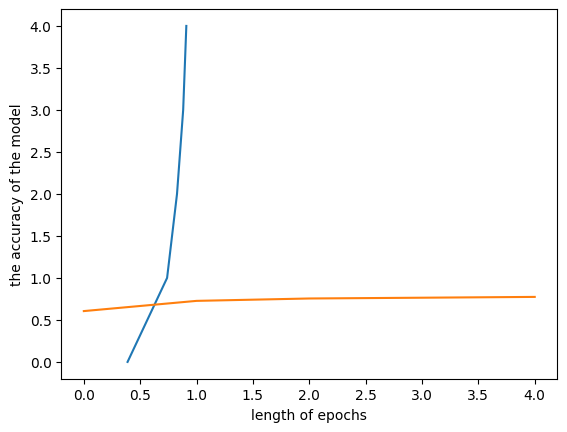

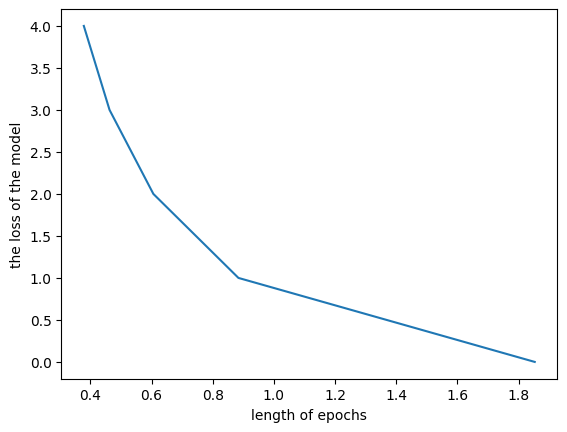

<Figure size 640x480 with 0 Axes>

In [20]:
plot_curve(resnet_history )

# Efficient model with efficientnet url

In [44]:
################Create efficinet model
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

import datetime

# steps for using transfer learning in your model
# 1. image data generator to resize the pictures in the format neural net can be used for.

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255)

test_gen = ImageDataGenerator(rescale = 1./255)

train_10_percent_data = train_gen.flow_from_directory(train_dir,
                                                      target_size = (224, 224),
                                                      batch_size = 32,
                                                      class_mode = 'categorical',

                                                      )

test_10_percent_data = test_gen.flow_from_directory(test_dir,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode ='categorical'
                                                    )


### creating callbacks to put in the fit of the model, and observe tensorboard
import tensorflow as tf
#import  tensorflow.keras.callbacks
import tensorflow_hub as hub



def create_callback_log(experiment_name,dir_name):
  log_dir = dir_name +'/'+ experiment_name + '/'+ datetime.datetime.now().strftime('%Y%m%d- %H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

  print(f'the experiment was saved on log file at  : {log_dir}')
  return tensorboard_callback





Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [26]:
#2. model creation and adding the first layer as efficient net

# first layer is feature_extraction layer
#transfer is possible by using hub
# create_model function to be used again.


def create_model( model_url ="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
, num_classes= 10):

  Image_shape = (224,224)
  Batch_size = 32


  efficient_model = hub.KerasLayer(model_url= "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                                    trainable =False, # putting the other parameters in freeze
                                    name = 'efficient_model',
                                    input_shape = Image_shape +(3,)) # for 3 rgb color

#3. model compile using optimizer and loss




In [30]:
efficient_model = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                                    trainable =False, # putting the other parameters in freeze
                                    name = 'efficient_model',
                                    input_shape = (224,224) +(3,)) # for 3 rgb color


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

model_2 = Sequential([
         efficient_model,
         Dense(10, activation = 'softmax') # 10 classes and categorical variable hence softmax function.
      ])



In [46]:
# compile the model
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics =['accuracy'])

history_2 =  model_2.fit(train_10_percent_data,
                         steps_per_epoch =len(train_10_percent_data),
                         validation_data = test_10_percent_data,
                         validation_steps = len(test_10_percent_data),
                         epochs = 5,
                         callbacks = [create_callback_log(dir_name= 'tensorflow_hub',
                                                          experiment_name = 'efficient_b0')])

the experiment was saved on log file at  : tensorflow_hub/efficient_b0/20240228- 195929
Epoch 1/5
24/24 [==============================] - 271s 11s/step - loss: 1.8162 - accuracy: 0.4480 - val_loss: 1.2797 - val_accuracy: 0.7396
Epoch 2/5
24/24 [==============================] - 258s 11s/step - loss: 1.0444 - accuracy: 0.7760 - val_loss: 0.8620 - val_accuracy: 0.8132
Epoch 3/5
24/24 [==============================] - 259s 11s/step - loss: 0.7499 - accuracy: 0.8427 - val_loss: 0.6960 - val_accuracy: 0.8420
Epoch 4/5
24/24 [==============================] - 258s 11s/step - loss: 0.6035 - accuracy: 0.8747 - val_loss: 0.6077 - val_accuracy: 0.8528
Epoch 5/5
24/24 [==============================] - 254s 11s/step - loss: 0.5091 - accuracy: 0.8853 - val_loss: 0.5556 - val_accuracy: 0.8616
